In [1]:
import pandas as pd
import jieba

# 数据源
- http://www.sogou.com/labs/resource/ca.php

In [2]:
df_news = pd.read_table('./data/val.txt',names=['category','theme','URL','content'],encoding='utf-8')
df_news = df_news.dropna()
df_news.tail()

,category,theme,URL,content
4995,时尚,常吃六类食物快速补充水分,http://lady.people.com.cn/GB/18248366.html,随着天气逐渐炎热，补水变得日益重要。据美国《跑步世界》杂志报道，喝水并不是为身体补充水分的唯...
4996,时尚,情感：你是我的那盘菜 吃不起我走【２】,http://lady.people.com.cn/n/2012/0712/c1014-18...,我其实不想说这些话刺激他，他也是不得已。可是，我又该怎样说，怎样做？我只能走，离开这个伤心地...
4997,时尚,揭秘不老女神刘晓庆的四任丈夫（图）,http://lady.people.com.cn/n/2012/0730/c1014-18...,５８岁刘晓庆最新嫩照Ｏ衷诘牧跸庆绝对看不出她已经５８岁了，她绝对可以秒杀刘亦菲、范冰冰这类美...
4998,时尚,样板潮爸 时尚圈里的父亲们,http://lady.people.com.cn/GB/18215232.html,导语：做了爸爸就是一种幸福，无论是领养还是亲生，更何况出现在影视剧中。时尚圈永远是需要领军人...
4999,时尚,全球最美女人长啥样？中国最美女人酷似章子怡（图）,http://lady.people.com.cn/BIG5/n/2012/0727/c10...,全球最美女人合成图：：国整形外科教授李承哲，在国际学术杂志美容整形外科学会学报发表了考虑种族...


In [3]:
df_news.category.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

#  分词

In [4]:
jieba.lcut('我是一条小青龙啊哈哈， 你怎么能这么讨厌呢？')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.796 seconds.
Prefix dict has been built succesfully.


['我',
 '是',
 '一条',
 '小',
 '青龙',
 '啊',
 '哈哈',
 '，',
 ' ',
 '你',
 '怎么',
 '能',
 '这么',
 '讨厌',
 '呢',
 '？']

In [10]:
content = df_news.content.tolist()
print (content[1000])

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏


In [11]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        content_S.append(current_segment)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.574 seconds.
Prefix dict has been built succesfully.


In [12]:
content_S[1000]

['阿里巴巴',
 '集团',
 '昨日',
 '宣布',
 '，',
 '将',
 '在',
 '集团',
 '管理',
 '层面',
 '设立',
 '首席',
 '数据',
 '官',
 '岗位',
 '（',
 'Ｃ',
 'ｈ',
 'ｉ',
 'ｅ',
 'ｆ',
 '\u3000',
 'Ｄ',
 'ａ',
 'ｔ',
 'ａ',
 '\u3000',
 'Ｏ',
 'ｆ',
 'ｆ',
 'ｉ',
 'ｃ',
 'ｅ',
 'ｒ',
 '）',
 '，',
 '阿里巴巴',
 'Ｂ',
 '２',
 'Ｂ',
 '公司',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '陆兆禧',
 '将',
 '会',
 '出任',
 '上述',
 '职务',
 '，',
 '向',
 '集团',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '马云',
 '直接',
 '汇报',
 '。',
 '＞',
 '菹',
 'ぃ',
 '和',
 '６',
 '月初',
 '的',
 '首席',
 '风险',
 '官',
 '职务',
 '任命',
 '相同',
 '，',
 '首席',
 '数据',
 '官亦为',
 '阿里巴巴',
 '集团',
 '在',
 '完成',
 '与',
 '雅虎',
 '股权',
 '谈判',
 '，',
 '推进',
 '“',
 'ｏ',
 'ｎ',
 'ｅ',
 '\u3000',
 'ｃ',
 'ｏ',
 'ｍ',
 'ｐ',
 'ａ',
 'ｎ',
 'ｙ',
 '”',
 '目标',
 '后',
 '，',
 '在',
 '集团',
 '决策',
 '层面',
 '新增',
 '的',
 '管理',
 '岗位',
 '。',
 '０',
 '⒗',
 '锛',
 '团',
 '昨日',
 '表示',
 '，',
 '“',
 '变成',
 '一家',
 '真正',
 '意义',
 '上',
 '的',
 '数据',
 '公司',
 '”',
 '已',
 '是',
 '战略',
 '共识',
 '。',
 '记者',
 '刘夏']

In [13]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


In [14]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head(10)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


# 去除停用词

In [15]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words

contents = df_content.content_S.tolist()    
stopwords = stopwords.stopword.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

In [16]:
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [62]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.tail()

,all_words
993923,美女
993924,日本
993925,美女
993926,韩国
993927,美女


In [19]:
import numpy

In [63]:
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":numpy.size})
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.tail()

C:\Users\Administrator\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,all_words,count
71430,眼线笔,1
71431,眼缘,1
71432,眼肌,1
71433,眼肿,1
52392,晋察冀,1


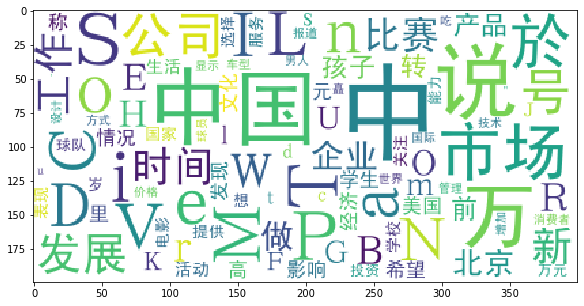

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

#  TF-IDF:提取关键词

In [30]:
import jieba.analyse
index = 2300
print (df_news['content'][index])
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=10, withWeight=False)))

明晚７点４５分，申花将在主场迎战北京国安，而德罗巴也将首次在中国球迷面前亮相。１３日下午７点，国安在虹口足球场召开发布会，帕切科表示：“就像一直以来一样，我们到每个客场都是为了取胜。联赛每场都很困难，没有容易的比赛，所以每场比赛我们都会尽全力去打好。我们会在胜利的前提下把比赛踢得很漂亮，然后把３分带走。上海有很好的阵容储备，但是他们在换帅的过程中不够稳定，这可以理解，当然一支球队频繁换帅，不是非常好的事情。但是他们有非常好的队员，所以明天的比赛会很精彩，双方都会尽全力把比赛打好。”Ｐ录用说耐庠格隆表示：“明天的比赛会非常精彩，上海的队员非常出色，我在录像中了解过了，我们的球队也会表现得非常出色，把３分带走。”＜钦撸嚎ㄅ特的状态怎么样，他明天会出场吗？Ｅ燎锌疲何业拿扛龆釉倍甲急负妹魈斓恼蕉罚卡努特来队的时间还短，还需要一点时间与球队磨合。所以明天卡努特不会打主力。＜钦撸焊据京沪两地的传统来看，北京连续两个客场在虹口输球，明天的胜算有多大？Ｅ燎锌疲何蚁嘈琶魈斓谋热要比去年会更好，因为去年来上海的时候，我们已经没有悬念地取得了联赛的第二名，这或多或少地会影响到队员的心态，虽然我不允许出现这种情况，但是我也无法完全阻止，但是明天我相信我的队员会带着极大的野心把这３分带走。＜钦撸呵胛式塘分不知道职业联赛以来，我们从来没有在虹口赢过球？Ｅ燎锌疲何也恢道，但是我不是一个迷信的人，我不去管之前战绩如何，每场比赛都是新的历史。上海还１比９输给国安，但是这些并不重要，当下才是最重要的。我们不要管历史上怎么样，最重要的是我对我们的队员都很有信心，明天我们会把比赛踢好，把比赛拿下来，这才是我们最重要的目标。＜钦撸耗芊衿兰垡幌驴ㄅ特和即将到来的德罗巴？Ｅ燎锌疲合衷诙杂诳ㄅ特和德罗巴作出评价还不够公正，因为他们还没有开始在这个联赛踢比赛，但是他们都是毫无疑问的高水平球员，像卡努特无论在法国在热刺在塞维利亚都踢得很好，一个队员在一个俱乐部能踢很多年，而且占据主力位置，这也是对他能力和人品的双重证明，这些我们可以从历史上看出来。德罗巴就更不用说了，他是欧洲最顶级联赛最顶级的队员，他的能力毋庸置疑，但是要看他在中超联赛最终的表现如何。我相信他们会对中超联赛作出很大的推动。无论是卡努特还是德罗巴还是格隆，都能够胜任欧洲的最顶级联赛。但是他们来到这里都是带着热情和对于足球的信任来这里，我相信他们在这里有

#  LDA:主题模型

格式要求：list of list形式，分词好的的整个语料

In [31]:
from gensim import corpora, models, similarities
import gensim

In [32]:
#做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]

In [33]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20) #类似Kmeans自己指定K值

In [36]:
#一号分类结果
print(lda.print_topic(1, topn=5))

0.010*"中" + 0.004*"说" + 0.004*"邱" + 0.003*"欧洲杯" + 0.003*"Ｔ"


In [37]:
for topic in lda.print_topics(num_topics=20, num_words=5):
    print(topic[1])

0.008*"中" + 0.005*"麽" + 0.004*"说" + 0.004*"分手" + 0.003*"中国"
0.010*"中" + 0.004*"说" + 0.004*"邱" + 0.003*"欧洲杯" + 0.003*"Ｔ"
0.009*"中" + 0.008*"男人" + 0.007*"说" + 0.004*"女人" + 0.003*"做"
0.008*"考生" + 0.007*"孩子" + 0.007*"中" + 0.005*"评委" + 0.005*"说"
0.006*"中" + 0.006*"发展" + 0.005*"教育" + 0.004*"中国" + 0.004*"学校"
0.005*"意大利" + 0.004*"中" + 0.004*"说" + 0.003*"学生" + 0.003*"女人"
0.010*"中国" + 0.005*"演出" + 0.004*"说" + 0.004*"香港" + 0.004*"发展"
0.010*"中国" + 0.010*"球队" + 0.009*"选手" + 0.006*"中" + 0.005*"Ｂ"
0.046*"ａ" + 0.042*"ｅ" + 0.036*"ｉ" + 0.032*"ｎ" + 0.031*"ｏ"
0.006*"中" + 0.005*"说" + 0.004*"Ｓ" + 0.004*"Ｔ" + 0.003*"中国"
0.005*"中" + 0.005*"美国" + 0.004*"中国" + 0.003*"Ｐ" + 0.003*"Ｃ"
0.009*"学生" + 0.007*"中" + 0.007*"撒" + 0.003*"说" + 0.003*"饰演"
0.006*"乳房" + 0.005*"唯" + 0.005*"性爱" + 0.005*"皮肤" + 0.004*"中"
0.016*"ｅ" + 0.014*"ａ" + 0.012*"ｏ" + 0.009*"ｉ" + 0.008*"ｌ"
0.008*"中" + 0.007*"文化" + 0.006*"中国" + 0.005*"比赛" + 0.004*"球队"
0.006*"中" + 0.005*"李小璐" + 0.005*"学校" + 0.004*"剧" + 0.004*"Ｍ"
0.015*"万" + 0.013*"号" + 0.005*"转"

# 贝叶斯分类

In [39]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [40]:
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [41]:
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [43]:
#x_train = x_train.flatten()
x_train[0][1]

'上海'

In [44]:
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0]        

'中新网 上海 日电 于俊 父亲节 网络 吃 一顿 电影 快餐 微 电影 爸 对不起 我爱你 定于 本月 父亲节 当天 各大 视频 网站 首映 葜 谱 鞣 剑 保慈 障蚣 钦 呓 樯 埽 ⒌ 缬 埃 ǎ 停 椋 悖 颍 铩 妫 椋 恚 称 微型 电影 新 媒体 平台 播放 状态 短时 休闲 状态 观看 完整 策划 系统 制作 体系 支持 显示 较完整 故事情节 电影 微 超短 放映 微 周期 制作 天 数周 微 规模 投资 人民币 几千 数万元 每部 内容 融合 幽默 搞怪 时尚 潮流 人文 言情 公益 教育 商业 定制 主题 单独 成篇 系列 成剧 唇 开播 微 电影 爸 对不起 我爱你 讲述 一对 父子 观念 缺少 沟通 导致 关系 父亲 传统 固执 钟情 传统 生活 方式 儿子 新派 音乐 达 习惯 晚出 早 生活 性格 张扬 叛逆 两种 截然不同 生活 方式 理念 差异 一场 父子 间 拉开序幕 子 失手 打破 父亲 心爱 物品 父亲 赶出 家门 剧情 演绎 父亲节 妹妹 哥哥 化解 父亲 这场 矛盾 映逋坏 嚼 斫 狻 ⒍ 粤 ⒌ 桨容 争执 退让 传统 尴尬 父子 尴尬 情 男人 表达 心中 那份 感恩 一杯 滤挂 咖啡 父亲节 变得 温馨 镁 缬 缮 虾 Ｎ 逄 煳 幕 传播 迪欧 咖啡 联合 出品 出品人 希望 观摩 扪心自问 父亲节 父亲 记得 父亲 生日 哪一天 父亲 爱喝 跨出 家门 那一刻 感觉 一颗 颤动 心 操劳 天下 儿女 父亲节 大声 喊出 父亲 家人 爱 完'

In [242]:
print (len(words))

3750


# 基于频率的词向量

## Counter

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [59]:
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer(ngram_range=(1,2))
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'fish', 'fish bird']
[[0 1 0 1 1 1 1 0]
 [0 2 1 0 1 1 0 0]
 [1 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 2 1]


In [52]:
vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vec.fit(words)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=4000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [53]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
test_words = []
for line_index in range(len(x_test)):
    try:
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[0]

'国家 公务员 考试 申论 应用文 类 试题 实质 一道 集 概括 分析 提出 解决问题 一体 综合性 试题 说 一道 客观 凝练 申发 论述 文章 题目 分析 历年 国考 申论 真题 公文 类 试题 类型 多样 包括 公文 类 事务性 文书 类 题材 从题 干 作答 材料 内容 整合 分析 无需 太 创造性 发挥 纵观 历年 申论 真题 作答 应用文 类 试题 文种 格式 作出 特别 重在 内容 考查 行文 格式 考生 平常心 面对 应用文 类 试题 准确 把握 作答 领会 内在 含义 把握 题材 主旨 材料 结构 轻松 应对 应用文 类 试题 Ｒ 弧 ⒆ 钒 盐 展文 写作 原则 Ｔ 材料 中来 应用文 类 试题 材料 总体 把握 客观 考生 材料 中来 材料 中 把握 材料 准确 理解 题材 主旨 Ｔ 政府 角度 作答 应用文 类 试题 更应 注重 政府 角度 观点 政府 角度 出发 原则 表述 观点 提出 解决 之策 考生 作答 站 政府 人员 角度 看待 提出 解决问题 Ｔ 文体 结构 形式 考查 重点 文体 结构 大部分 评分 关键点 解答 方法 薄 ⒆ ス 丶 词 明 方向 作答 题目 题干 作答 作答 方向 作答 角度 关键 向导 考生 仔细阅读 题干 作答 抓住 关键词 作答 方向 相关 要点 整理 作答 思路 年国考 地市级 真 题为 例 潦惺姓 府 宣传 推进 近海 水域 污染 整治 工作 请 给定 资料 市政府 工作人员 身份 草拟 一份 宣传 纲要 Ｒ 求 保对 宣传 内容 要点 提纲挈领 陈述 玻 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 超过 字 肮 丶 词 近海 水域 污染 整治 工作 市政府 工作人员 身份 宣传 纲要 提纲挈领 陈述 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 提示 归结 作答 要点 包括 污染 情况 原因 解决 对策 作答 思路 情况 原因 对策 意义 逻辑 顺序 安排 文章 结构 病 ⒋ 缶殖 龇 ⅲ 明 结构 解答 应用文 类 试题 考生 材料 整体 出发 大局 出发 高屋建瓴 把握 材料 主题 思想 事件 起因 解决 对策 阅读文章 构建 文章 结构 直至 快速 解答 场 ⒗ 硭 乘悸 罚明 逻辑 应用文 类 试题 严密 逻辑思维 情况 原因 对策 意义

In [55]:
classifier.score(vec.transform(test_words), y_test)

0.804

## Tf-idf

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0, max_features=4000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [60]:
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

classifier.score(vectorizer.transform(test_words), y_test)

0.8152